<ipython-input-135-2af4aae3dd86>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","day1","","","day2","","","day3"])


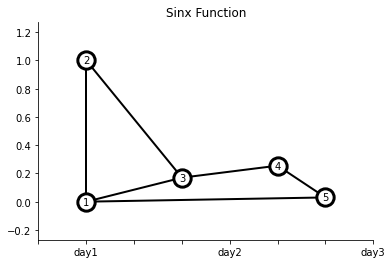

[Text(-1.0, 0, ''), Text(0.0, 0, 'day1'), Text(1.0, 0, ''), Text(2.0, 0, ''), Text(3.0, 0, 'day2'), Text(4.0, 0, ''), Text(5.0, 0, ''), Text(6.0, 0, 'day3')]
XAxis(54.0,36.0)


In [135]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (0, 1), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 2,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)


plt.axis("on")
ax.set_title("Sinx Function")
# plt.xlabel("x")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# ax.xaxis.set_ticks([1,2,3,4,5,6,7],["day1","","","day2","","","day3"])  
ax.set_xlim(-1,6)
ax.set_xticklabels(["","day1","","","day2","","","day3"])

plt.show()



print(ax.xaxis.get_ticklabels())
print(ax.xaxis)

In [61]:
import pandas as pd
d = pd.DataFrame({"start":[1,1,1,2,3,4,5],
                  "end":[2,3,4,4,2,2,3],
                  "weight":[1,1,2,3,4,5,4],
                  "size":[2,2,2,4,9,2,1],
                  "catigory":["a","a","a","c","b","d","c"],
                  "x":[0,0,1,1,1,2,3],
                  "y":[0,0.5,0,0.5,0.5,0,0.5]})
d

,start,end,weight,size,catigory,x,y
0,1,2,1,2,a,0,0.0
1,1,3,1,2,a,0,0.5
2,1,4,2,2,a,1,0.0
3,2,4,3,4,c,1,0.5
4,3,2,4,9,b,1,0.5
5,4,2,5,2,d,2,0.0
6,5,3,4,1,c,3,0.5


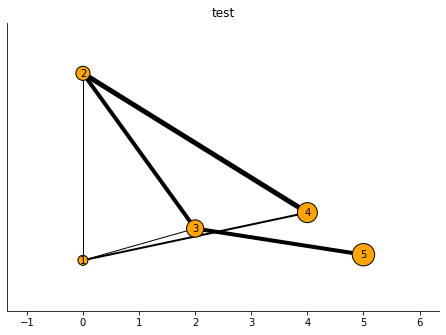

In [104]:
options = {
    "font_size": 10,
#     "node_size": 300,
    "node_color": "orange",
    "edgecolors": "black",
#     "linewidths": 2,
#     "width": 2,
}
G = nx.Graph()
for i in d.index:
    G.add_edge(d.loc[i,"start"],d.loc[i,"end"],weight=int(d.loc[i,"weight"]))

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, 
        node_size=[100,200,300,400,500], 
        nodelist=[1,2,3,4,5], 
        width=weights,
        with_labels=True,
        **options)    

ax = plt.gca()
ax.margins(0.20)

plt.axis("on")
ax.set_title("test")
# plt.xlabel("x")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# ax.xaxis.set_ticks([1,2,3,4,5,6,7],["day1","","","day2","","","day3"])  
# ax.set_xlim(-1,6)
# ax.set_xticklabels(["","day1","","","day2","","","day3"])

       
# nx.draw_networkx(G, pos, node_size=[100,200,300,400,500], nodelist=[1,2,3,4,5],**options)
# nx.draw_networkx_edges(G, pos, alpha=0.5,edges=edges,width=weights)

# final version

In [188]:
import pandas as pd

edged = pd.DataFrame({"n1":[1,1,1,2,3,4,5],
                      "n2":[2,3,4,4,2,2,3],
                      "weight":[1,1,2,3,4,5,4],
#                       "weigth_color":["orange","orange","red","red","blue","green","green"]
                      "weigth_color":["black","black","black","black","black","black","black"]
                     })

noded = pd.DataFrame({"n":[1,2,3,4,5],
                      "size":[2,2,9,20,1],
#                       "node_color":["orange","orange","red","blue","green"],
                      "node_color":["orange","orange","orange","orange","orange"],
                      "y":["t1","m1","t2","t3","m2"],
                      "x":["day1","day1","day2","day3","day3"]})

edged
noded
edged.to_csv("./edge_file.txt",sep=",",index=False)
noded.to_csv("./node_file.txt",sep=",",index=False)

['', 'day1', '', 'day2', '', 'day3', ''] ['', 'm1', 'm2', 't1', 't2', 't3', '']
{'day1': 0, 'day2': 2, 'day3': 4} {'t2': 0, 't1': 1, 'm2': 2, 'm1': 3, 't3': 4}
5 5
{1: [0, 2], 2: [0, 0], 3: [2, 3], 4: [4, 4], 5: [4, 1]}


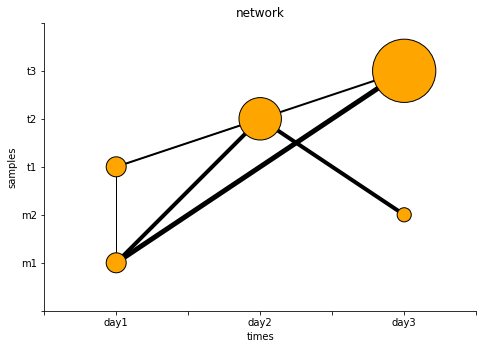

In [210]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os,argparse

# parser = argparse.ArgumentParser(description='network veen',usage="python $0 -e edge_profile -n node_profile")
# ##required
# parser.add_argument("-e",type=str,required=True,help="edge_profile. header must same with example/edge_file.txt")
# parser.add_argument("-n",type=str,required=True,help="node_profile. header must same with example/node_file.txt")
# ##optional
# parser.add_argument("-o",type=str,help="output image",default="./output.network_veen.pdf")
# parser.add_argument("--title",type=str,help="title of output image",default="network")
# parser.add_argument("--xlable",type=str,help="xlable of output image",default="day")
# parser.add_argument("--ylable",type=str,help="ylable of output image",default="sample")

# args = parser.parse_args()


##-----------------------------
## load data
##-----------------------------


# edge_file = args.e
# node_file = args.n

edge_file = "./network_veen/example/edge_file.txt"
node_file = "./network_veen/example/node_file.txt"
edged = pd.read_csv(edge_file,header=0)
noded = pd.read_csv(node_file,header=0)


##-----------------------------
## run network
##-----------------------------
G = nx.Graph()

for i in edged.index:
    G.add_edge(edged.loc[i,"n1"],edged.loc[i,"n2"],
               weight=int(edged.loc[i,"weight"]),
               color=edged.loc[i,"weigth_color"])

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
colors = [G[u][v]['color'] for u,v in edges]

##-----------------------------
##change axes str to int
##-----------------------------
posD = {}
## change string to int value
xstep = 2
ystep = 1
x_label = sorted(set(noded.x))
y_label = sorted(set(noded.y))

##this is for change str to int pos
x_label_int={value:index*xstep for index,value in enumerate(x_label)}
y_label_int={value:index*ystep for index,value in enumerate(y_label)}

##this is for set the display label 
x_label_int2str={index*xstep:value for index,value in enumerate(x_label)}
y_label_int2str={index*ystep:value for index,value in enumerate(y_label)}

x_lim_value = (len(x_label) - 1)* xstep + 1
y_lim_value = (len(y_label) - 1)* ystep + 1

min_value=-1
x_label_str = [x_label_int2str[x] if x in x_label_int2str else "" for x in range(min_value, x_lim_value + 1)]
y_label_str = [y_label_int2str[y] if y in y_label_int2str else "" for y in range(min_value, y_lim_value + 1)]

        
print(x_label_str,y_label_str)
print(new_x_label,new_y_label)
print(x_lim_value,y_lim_value)

## form the pos dict
for i in noded.index:
    posD[noded.loc[i,"n"]] = [x_label_int[noded.loc[i,"x"]],
                              y_label_int[noded.loc[i,"y"]]]
    
print(posD)

##-----------------------------
## plot net work
##-----------------------------

nx.draw(G, posD, 
        node_size=noded["size"]*200, 
        nodelist=noded["n"] , 
        node_color = noded.node_color,
        edgecolors = "black",
#         with_labels=True, font_size = 10,
        width=weights,
        edge_color = colors)

## set axes
ax = plt.gca()
ax.margins(0.20)

plt.axis("on")
ax.set_title("network")
plt.xlabel("times")
plt.ylabel("samples")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## set int to str axes
ax.set_xlim(min_value,x_lim_value)
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(x_label_str)


ax.set_ylim(min_value,y_lim_value)
yticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(y_label_str)

plt.savefig("output.jpg",dpi=300,bbox_inches='tight')


# final version -- end